In [77]:
#Installing all libraries to virtual environment
!pip install openml scikit-learn 
!pip install utils
!pip install tensorflow
!pip install keras
!pip install scikitplot 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement scikitplot (from versions: none)
ERROR: No matching distribution found for scikitplot


In [78]:
#Importing csv dataset from PC
from google.colab import drive, files
drive.mount('/content/drive')
uploaded = files.upload()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Saving train_ver6(1).csv to train_ver6(1) (2).csv


In [79]:
#Importing all modules used in the code
import utils 
import random
import cv2
import os
import itertools  
from imutils import paths
import numpy as np
from numpy import mean
from numpy import std
import pandas as pd
import matplotlib.pyplot  as plt
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer
from sklearn.model_selection import RepeatedKFold
#from sklearn.utils import shuffle
#from sklearn.model_selection import RepeatedKFold
from sklearn.metrics import confusion_matrix
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.metrics import  auc
import tensorflow as tf
import keras as k
from keras.models import Sequential
from keras.layers import Dense
from keras.models import Sequential
#from keras.layers import Activation
from keras.layers import Flatten
from keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from keras import backend as K
import seaborn as sns
import keras.metrics




### ***data for diss***

In [80]:
#Reading csv file and storing into pandas dataframe
df = pd.read_csv(r'train_ver6(1).csv', na_values=['#NAME?'] , encoding='latin-1')
df = df.drop(columns=[ 'id', 'ult_fec_cli_1t', 'spouse', 'province_code'])
df = df.dropna()
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='constant', fill_value=1)
imputer.fit_transform(df)
df = pd.DataFrame(data=imputer.transform(df), columns=df.columns)

In [81]:
nan_value = float("NaN")
df.replace("", nan_value, inplace=True)
df.dropna(inplace=True)

In [82]:
df

,employee_status,country_residence,gender,age,cust_new,cust_seniority,init_cust_that_left,indrel_1mes,cust_relation_start_of_month,residence_index,...,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1
0,N,ES,H,35,0,6,1,1,A,S,...,0,0,0,0,0,0,0,0,0,0
1,N,ES,V,23,0,35,1,1,I,S,...,0,0,0,0,0,0,0,0,0,0
2,N,ES,V,23,0,35,1,1,I,S,...,0,0,0,0,0,0,0,0,0,0
3,N,ES,H,22,0,35,1,1,I,S,...,0,0,0,0,0,0,0,0,0,0
4,N,ES,H,23,0,35,1,1,I,S,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
829,N,ES,V,8,0,35,1,1,A,S,...,0,0,0,0,0,0,0,0,0,0
830,N,ES,V,28,0,35,1,1,I,S,...,0,0,0,0,0,0,0,0,0,0
831,N,ES,V,22,0,35,1,1,I,S,...,0,0,0,0,0,0,0,0,0,0
832,N,ES,V,22,0,35,1,1,I,S,...,0,0,0,0,0,0,0,0,0,0


In [83]:
target_labels  = ['ind_ahor_fin_ult1' ,'ind_aval_fin_ult1' ,'ind_cco_fin_ult1' ,'ind_cder_fin_ult1' ,'ind_cno_fin_ult1'
               ,'ind_ctju_fin_ult1' ,'ind_ctma_fin_ult1' ,'ind_ctop_fin_ult1' ,'ind_ctpp_fin_ult1' ,'ind_deco_fin_ult1'
               ,'ind_deme_fin_ult1' ,'ind_dela_fin_ult1' ,'ind_ecue_fin_ult1' ,'ind_fond_fin_ult1' ,'ind_hip_fin_ult1'
               ,'ind_plan_fin_ult1' ,'ind_pres_fin_ult1' ,'ind_reca_fin_ult1' ,'ind_tjcr_fin_ult1' ,'ind_valo_fin_ult1'
               ,'ind_viv_fin_ult1' ,'ind_nomina_ult1' ,'ind_nom_pens_ult1' ,'ind_recibo_ult1']
labels = df[target_labels]

features = df.drop(columns=target_labels)
features = features.drop(columns= ['employee_status', 'country_residence', 'cust_new','indrel_1mes', 'residence_index','indrel_1mes', 'indfall','tipodom'])
features.count()

gender                          834
age                             834
cust_seniority                  834
init_cust_that_left             834
cust_relation_start_of_month    834
foreigner_index                 834
input_channel                   834
province_name                   834
cust_active                     834
gross_income                    834
segmentation                    834
dtype: int64

###***Data preprocessing***

In [84]:
numerical_labels = ['age', 'cust_seniority', 'gross_income']
#Normalizing numerical columns
from sklearn import preprocessing
temp = features[numerical_labels] #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
features_scaled = min_max_scaler.fit_transform(temp)
features[numerical_labels] = pd.DataFrame(features_scaled)


In [85]:
#One hot encoding (dummy variables) catagorical features in dataset
catagorical_labels = ['gender',  'cust_relation_start_of_month', 'cust_active',                     
                'foreigner_index',  'segmentation', 'input_channel', 'province_name' ]
def dummy_df(df, catagorical_features):
  for i in catagorical_features:
    dummies = pd.get_dummies(df[i], prefix=i, dummy_na=False)
    df = df.drop(i, 1)
    df = pd.concat([df, dummies], axis=1)
  return df
features = dummy_df(features, catagorical_labels)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  import sys


In [86]:
#Shuffling data then splitting dataset into training and testing samples
features = shuffle(features)
labels = shuffle(labels)
X_train, X_test, y_train, y_test = train_test_split(features, labels, train_size=0.80, random_state = 1)
X_train

,age,cust_seniority,init_cust_that_left,gross_income,gender_H,gender_V,cust_relation_start_of_month_A,cust_relation_start_of_month_I,cust_active_0,cust_active_1,...,province_name_SANTA CRUZ DE TENERIFE,province_name_SEGOVIA,province_name_SEVILLA,province_name_SORIA,province_name_TERUEL,province_name_TOLEDO,province_name_VALENCIA,province_name_VALLADOLID,province_name_ZAMORA,province_name_ZARAGOZA
69,0.282051,1.0,1,0.221364,1,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
545,0.205128,1.0,1,0.093419,0,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
85,0.410256,1.0,1,0.032097,0,1,0,1,1,0,...,0,0,0,0,0,1,0,0,0,0
658,0.205128,1.0,1,0.215557,0,1,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
592,0.205128,1.0,1,0.125817,1,0,0,1,1,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,0.487179,1.0,1,0.106318,1,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
138,0.217949,1.0,1,0.078878,0,1,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
452,0.217949,1.0,1,0.126429,1,0,0,1,1,0,...,0,0,0,0,0,1,0,0,0,0
566,0.205128,1.0,1,0.068595,1,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0


In [87]:
#Converting data types to make data parsable
X_train , y_train = X_train.values, y_train.values 
X_train = np.asarray(X_train).astype('float32')
y_train = np.asarray(y_train).astype('float32')

X_test , y_test = X_test.values, y_test.values 
X_test = np.asarray(X_test).astype('float32')
y_test = np.asarray(y_test).astype('float32')


### ***Model creation***

In [88]:
#Defining neural network model for centralized learning and federated learning
class Model:
    @staticmethod
    def build(n_inputs, n_ouputs):
      model = Sequential()
      model.add(Dense(300, input_dim=n_inputs, 
                      activation='relu'))
      model.add(Dense(300, activation='relu'))
      model.add(Dense(n_ouputs, activation='sigmoid'))
      model.compile(loss='binary_crossentropy', optimizer='SGD')
      return model
    

In [89]:
def evaluate_model(X_test, y_test,  model, round_no,
                   accuracy_list, recall_list, precision_list, f1_list, loss_list):
  '''
      Function to calculate, print and store evaluation metrics of a model
      returns:
            -predictions: all predictions without rounding
      args: 
            -X_test, y_test: testing data
            - model: the training model
            -round_no: epoch number (centralized learning) or 
             round number(federated learning)
            -accuracy_list, recall_list, precision_list, f1_list, loss_list:
             all lists to store the models over epochs/rounds
 
  '''
  bce = tf.keras.losses.BinaryCrossentropy(from_logits=True)
  y_pred = model.predict(X_test)
  y_pred_rounded = np.around(y_pred)

  loss = bce(y_test, y_pred_rounded)
  loss_list.append(loss)
  #Confusion matrices for all labels
  confusion_matrices = multilabel_confusion_matrix(y_test, y_pred_rounded)
  #Summing all the matrices to get aggregated confusion matrix 
  sum_matrix = np.array(([0,0],[0,0]))
  for matrix in confusion_matrices:
    sum_matrix += matrix
  tp = sum_matrix[1][1]
  tn = sum_matrix[0][0]
  fn = sum_matrix[1][0]
  fp = sum_matrix[0][1]
  accuracy = (tp + tn)/(tp + fp + tn + fn)
  accuracy_list.append(accuracy)

  recall = tp / (tp + fn)
  recall_list.append(recall)

  precision = tp / (tp + fp)
  precision_list.append(precision)

  f1 = (2 * precision * recall)/ (precision + recall)
  f1_list.append(f1)

  print('''\n {} | accuracy: {:.3%} | recall: {}| precision: {:.3%} | f1: {}
  | loss: {:.3%}'''.format(round_no, accuracy, recall, precision, f1, loss))
  return y_pred

##**Federated learning**

#FL data processing

In [90]:
def create_clients(X, y, num_clients=10, initial='client'):
    ''' 
        Function to create clients and assign sections of training dataset to them
        return: 
            a dictionary with clients' names as keys and their 
            their data shards as values
        args: 
            X: All features used for training
            y:All labels used for training
            num_client: number of fedrated clients
            initials: the clients'name prefix, e.g, client_1, client_2
            
    '''

    #Create a list of client names
    client_names = ['{}_{}'.format(initial, i+1) for i in range(num_clients)]

    #Grouping features and their corresponding labels together
    data = np.array(list(zip(X,y)))
    random.shuffle(data)

    #Splitting data ("shard": section of data assinged to a user)
    size = len(X)//num_clients
    shards = [data[i:i + size] for i in range(0, size*num_clients, size)]

    #Number of clients must equal number of shards
    assert(len(shards) == len(client_names))

    return {client_names[i] : shards[i] for i in range(len(client_names))} 

In [91]:
def batch_data(data_shard):
    '''
        Converts a client's shard into a usable datatype
        args:
             shard: A section of data assinged to a user
        return:
             Arrays of features (X) and labels (y)'''
    X, y = zip(*data_shard)
    X = np.asarray(X)
    y = np.asarray(y)
    return X, y

In [92]:
#Creating new clients and assinging shards
clients = create_clients(X_train, y_train, num_clients=10, initial='clients')

clients_batched = dict()
for (client_name, data) in clients.items():
    clients_batched[client_name] = batch_data(data)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


#FedAvg functions

In [93]:

def weight_scaling_factor(clients_train_data, client_name):
  '''
      Function to calculate a clients scaling factor for their weights
      returns: 
            -the scalar value
      args: 
            -dictionary all data used for training (clients_batched)
            -client's name                                   
 '''                                   
  client_names = list(clients_train_data.keys())
  client_features = clients_train_data[client_name][0]
  client_datapoints_count = len(client_features)

  global_datapoints_count = 0
  for client_name in client_names:
    client_features = clients_batched[client_name][0]
    client_batch_size = len(client_features)
    global_datapoints_count = global_datapoints_count + client_batch_size

    
  return client_datapoints_count/client_datapoints_count


def scale_model_weights_fedavg(weight, scalar):
  '''
      Function for scaling client's model weights by their scaling factor
      returns: 
            -client's model weights scaled
      args: 
            -client's model weights
            -clients scaling factor   
  '''

  weight_scaled = []
  steps = len(weight)
  for i in range(steps):
    weight_scaled.append((scalar * weight[i]))
  return weight_scaled
  
def scale_model_weights_qfedavg(weight, scalar, loss, q):
  '''
      Function for scaling client's model weights by their scaling factor
      returns implenting q - fedavg: 
            -client's model weights scaled
      args: 
            -client's model weights
            -clients scaling factor
            -client's loss
            -q value   
  '''
  q += 1
  weight_scaled = []
  steps = len(weight)
  for i in range(steps):
    weight_scaled.append(((scalar * weight[i])/ q)* pow(loss,q))
  return weight_scaled



def sum_scaled_weights(scaled_weight_list):
  '''
      Function to average all clients' weights.
      returns:
            -averaged weights
      args: 
            -list of all clients' weights
 
  '''
  avg_grad = list()
  #Calculating the average gradient accross all client weights
  for grad_list in zip(*scaled_weight_list):
    layer_mean = tf.math.reduce_sum(grad_list, axis=0)
    avg_grad.append(layer_mean)
  return avg_grad



###***Model deployment***

#Federated learning

In [94]:
#Lists to store evaluation metrics of each round of learning 
accuracy_list_federated = []
recall_list_federated = []
precision_list_federated = []
f1_list_federated = []
rounds_list = []
loss_list_federated = []

#Model Hyper paramaters
lr = 0.01 
rounds = 9
loss='binary_crossentropy'
optimizer = SGD(lr=lr, 
                decay=lr / rounds, 
                #momentum=0.9
               )    
#Initialize global model
Model_federated = Model()
global_model = Model_federated.build(X_train.shape[1], y_train.shape[1])

#Global training loop
for round in range(rounds):
    rounds_list.append(round + 1)

    # Inital weights for clients
    global_weights = global_model.get_weights()
    
    #Initial list to collect local model weights after scalling
    scaled_local_weight_list = list()

    #Randomize client data - using keys
    client_names= list(clients_batched.keys())
    random.shuffle(client_names)
    
    #loop through each client and create new local model
    for client in client_names:

        smlp_local = Model()
        local_model = smlp_local.build(X_train.shape[1], y_train.shape[1])

        
        #set local model weight to the weight of the global model
        local_model.set_weights(global_weights)
        
        local_model.fit(clients_batched[client][0],clients_batched[client][1], 
                        epochs=5, verbose=0)
        

        bce = tf.keras.losses.BinaryCrossentropy(from_logits=True)
        y_pred = local_model.predict(X_test)
        y_pred_rounded = np.around(y_pred)
        local_loss = bce(y_test, y_pred_rounded)

        #scale the model weights and add to list
        scaling_factor = weight_scaling_factor(clients_batched, client)
        #scaled_weights = scale_model_weights_fedavg(local_model.get_weights(), 
                                             #scaling_factor)
        scaled_weights = scale_model_weights_qfedavg(local_model.get_weights(), 
                                            scaling_factor, local_loss, 1)
        scaled_local_weight_list.append(scaled_weights)

        #clear session to free memory after each communication round
        K.clear_session()
        
    #Calculate average weights of all clients
    average_weights = sum_scaled_weights(scaled_local_weight_list)
    
    #update global model 
    global_model.set_weights(average_weights)
    test_batched = X_test, y_test
    #Evaluate global model and print out metrics after each communications round
    y_pred_federated = evaluate_model(X_test, y_test, global_model, round + 1,
                                      accuracy_list_federated, 
                                      recall_list_federated,
                                      precision_list_federated,f1_list_federated, 
                                      loss_list_federated)
    


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)



 1 | accuracy: 59.506% | recall: 0.11764705882352941| precision: 1.636% | f1: 0.028725314183123882
  | loss: 91.413%

 2 | accuracy: 80.539% | recall: 0.46568627450980393| precision: 12.402% | f1: 0.1958762886597938
  | loss: 78.796%

 3 | accuracy: 94.885% | recall: 0.696078431372549| precision: 49.825% | f1: 0.5807770961145194
  | loss: 70.181%

 4 | accuracy: 96.856% | recall: 0.7107843137254902| precision: 68.396% | f1: 0.6971153846153846
  | loss: 68.977%

 5 | accuracy: 97.031% | recall: 0.6862745098039216| precision: 71.795% | f1: 0.7017543859649124
  | loss: 68.839%

 6 | accuracy: 98.253% | recall: 0.7598039215686274| precision: 88.068% | f1: 0.8157894736842105
  | loss: 68.171%

 7 | accuracy: 98.378% | recall: 0.7647058823529411| precision: 90.173% | f1: 0.8275862068965517
  | loss: 68.099%

 8 | accuracy: 98.428% | recall: 0.7647058823529411| precision: 91.228% | f1: 0.8319999999999999
  | loss: 68.068%

 9 | accuracy: 97.879% | recall: 0.7647058823529411| precision: 80.82

#Centralized learning

In [95]:
#Callback function that'll be called when evaluate performance of the model every epoch
class evaluate_model_callback(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
       evaluate_model(X_test, y_test,  model, epoch + 1, accuracy_list_centralized, 
                      recall_list_centralized, precision_list_centralized, 
                      f1_list_centralized, loss_list_centralized)
       epoch_list.append(epoch + 1)



In [96]:
#Lists to store evaluation metrics of each round of learning 
accuracy_list_centralized = []
recall_list_centralized = []
precision_list_centralized = []
f1_list_centralized = []
loss_list_centralized = []
epoch_list = []

#Model hyper parameters
lr = 10
comms_round = 10
loss='binary_crossentropy'
metrics = ['accuracy']
optimizer = SGD()  
#Building and running the model
Model_centralized = Model()
model = Model_centralized.build(X_train.shape[1], y_train.shape[1]) 
model.fit(X_train, y_train, epochs=45, callbacks=[evaluate_model_callback()])







Epoch 1/45
 1/21 [>.............................] - ETA: 6s - loss: 0.7035
 1 | accuracy: 51.223% | recall: 0.08333333333333333| precision: 0.952% | f1: 0.017094017094017092
  | loss: 96.508%
21/21 [==============================] - 0s 6ms/step - loss: 0.6927
Epoch 2/45
 1/21 [>.............................] - ETA: 0s - loss: 0.6839
 2 | accuracy: 63.573% | recall: 0.1715686274509804| precision: 2.640% | f1: 0.0457516339869281
  | loss: 88.957%
21/21 [==============================] - 0s 5ms/step - loss: 0.6731
Epoch 3/45
 1/21 [>.............................] - ETA: 0s - loss: 0.6600
 3 | accuracy: 74.127% | recall: 0.3284313725490196| precision: 6.929% | f1: 0.11443210930828351
  | loss: 82.604%
21/21 [==============================] - 0s 4ms/step - loss: 0.6540
Epoch 4/45
 1/21 [>.............................] - ETA: 0s - loss: 0.6415
 4 | accuracy: 84.107% | recall: 0.5588235294117647| precision: 17.247% | f1: 0.2635838150289017
  | loss: 76.697%
21/21 [============================

###***Model evaluation visualisation***

Run all cells chronologically 

In [97]:
'Functions to plot evaluation metrics of both models'
rounds_list2 = [i * 5 for i in rounds_list]
def plot_accuracy():
  plt.figure(1)
  plt.figure(figsize = (12, 12))
  plt.xlim((1,len(epoch_list) ))
  plt.ylim(((0, 1.1)))
  plt.plot(epoch_list, accuracy_list_centralized, label='Centralised learning')
  plt.plot(rounds_list2, accuracy_list_federated, label='Federated Learning')
  plt.xlabel('Epochs/federated rounds')
  plt.ylabel('Accuracy rate')
  plt.title('Accuracy rates', pad = 25, fontsize = 30)
  plt.legend(loc='best')
  plt.show

def plot_recall():
  plt.figure(1)
  plt.figure(figsize = (12, 12))
  plt.xlim((1,len(epoch_list) ))
  plt.ylim(((0, 1.1)))
  plt.plot(epoch_list, recall_list_centralized, label='Centralised learning')
  plt.plot(rounds_list2, recall_list_federated, label='Federated Learning')
  plt.xlabel('Epochs/federated rounds')
  plt.ylabel('Recall rate')
  plt.title('Recall rates', pad = 25, fontsize = 30)
  plt.legend(loc='best')
  plt.show()
def plot_f1():
  plt.figure(1)
  plt.figure(figsize = (12, 12))
  plt.xlim((1,len(epoch_list) ))
  plt.ylim(((0, 1.1)))
  plt.plot(epoch_list, f1_list_centralized, label='Centralised learning')
  plt.plot(rounds_list2, f1_list_federated, label='Federated Learning')
  plt.xlabel('Epochs/federated rounds')
  plt.ylabel('F1 rate')
  plt.title('F1 rates', pad = 25, fontsize = 30)
  plt.legend(loc='best')
  plt.show()
def plot_precision():
  plt.figure(1)
  plt.figure(figsize = (12, 12))
  plt.xlim((1,len(epoch_list) ))
  plt.ylim(((0, 1.1)))
  plt.plot(epoch_list, precision_list_centralized, label='Centralised learning')
  plt.plot(rounds_list2, precision_list_federated, label='Federated Learning')
  plt.xlabel('Epochs/federated rounds')
  plt.ylabel('Precision rate')
  plt.title('Precision rates', pad = 25, fontsize = 30)
  plt.legend(loc='best')
  plt.show()
def plot_loss():
  plt.figure(1)
  plt.figure(figsize = (12, 12))
  plt.xlim((1,len(epoch_list) ))
  plt.ylim(((0, 1.1)))
  plt.plot(epoch_list, loss_list_centralized, label='Centralised learning')
  plt.plot(rounds_list2, loss_list_federated, label='Federated Learning')
  plt.xlabel('Epochs/federated rounds')
  plt.ylabel('Loss rate')
  plt.title('Loss rates', pad = 25, fontsize = 30)
  plt.legend(loc='best')
  plt.show()

<Figure size 432x288 with 0 Axes>

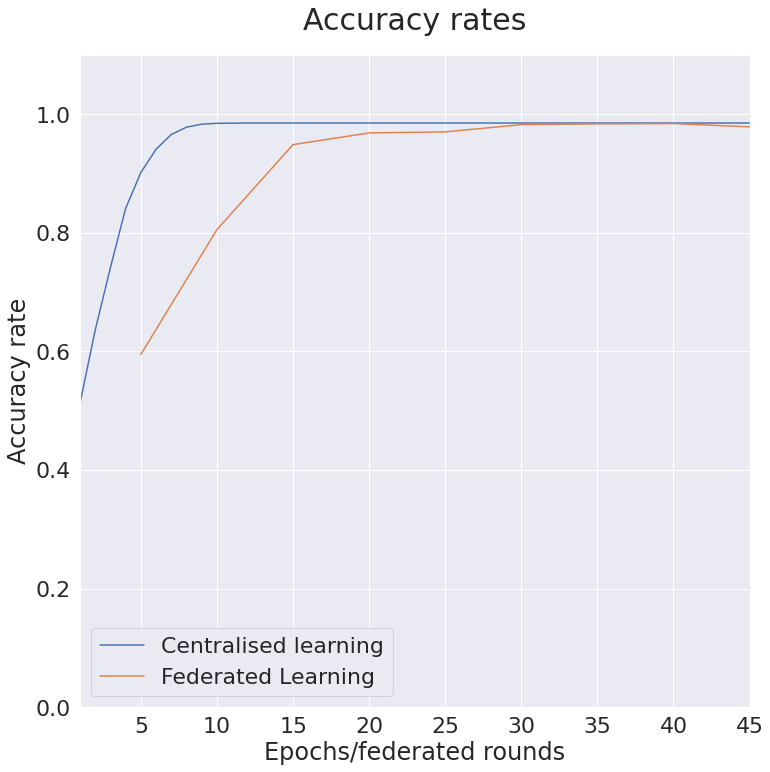

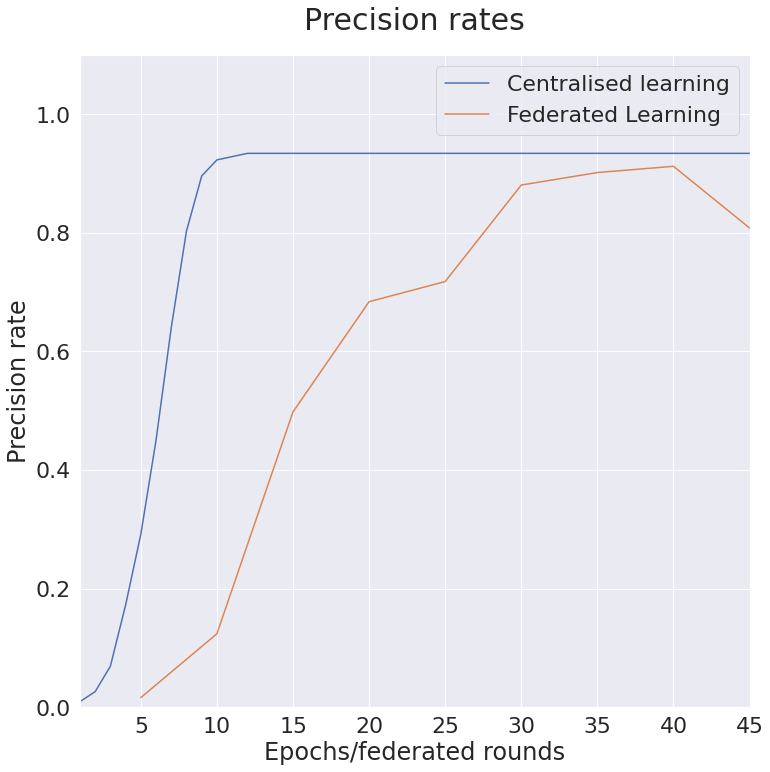

<Figure size 432x288 with 0 Axes>

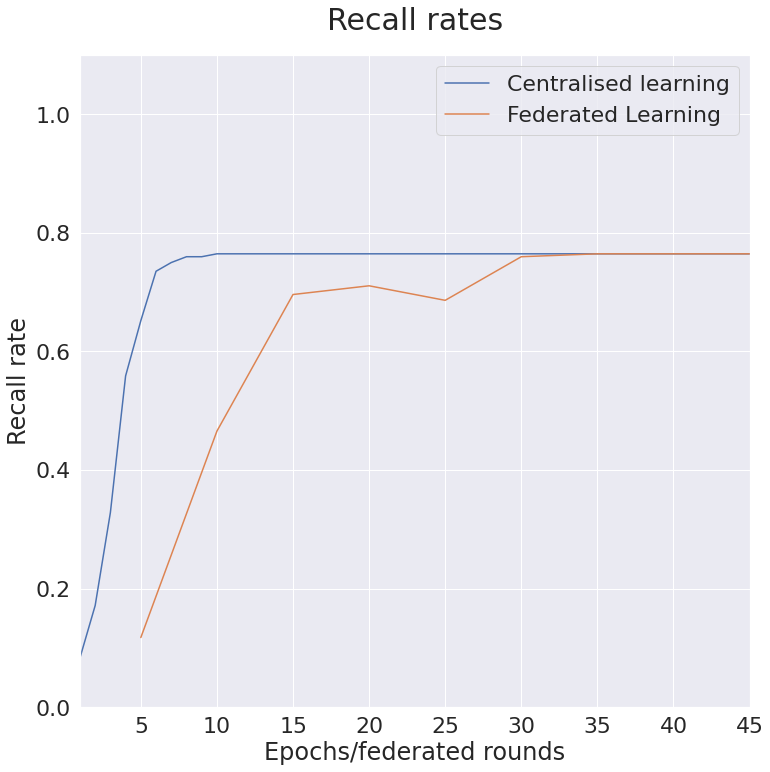

<Figure size 432x288 with 0 Axes>

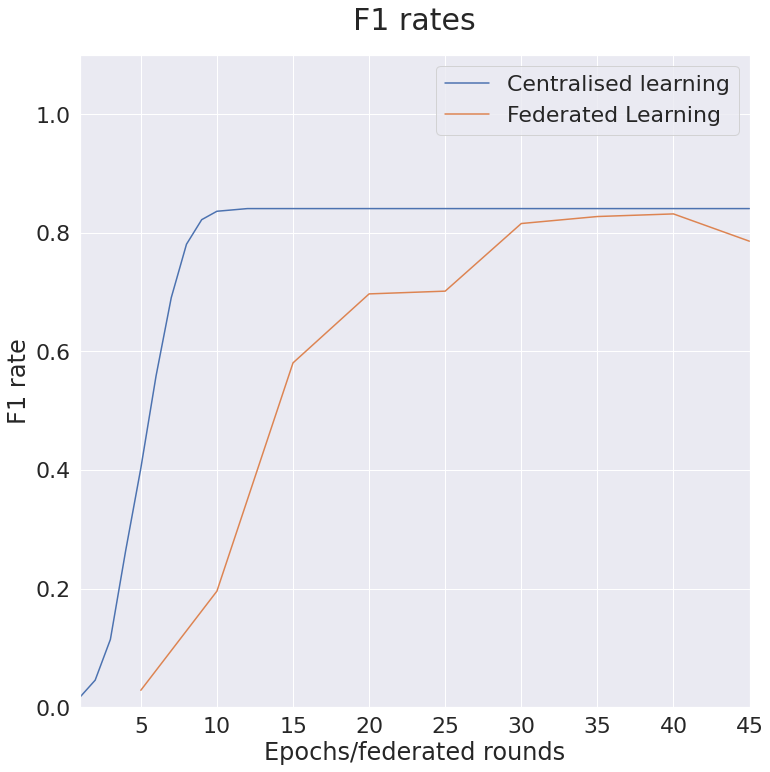

<Figure size 432x288 with 0 Axes>

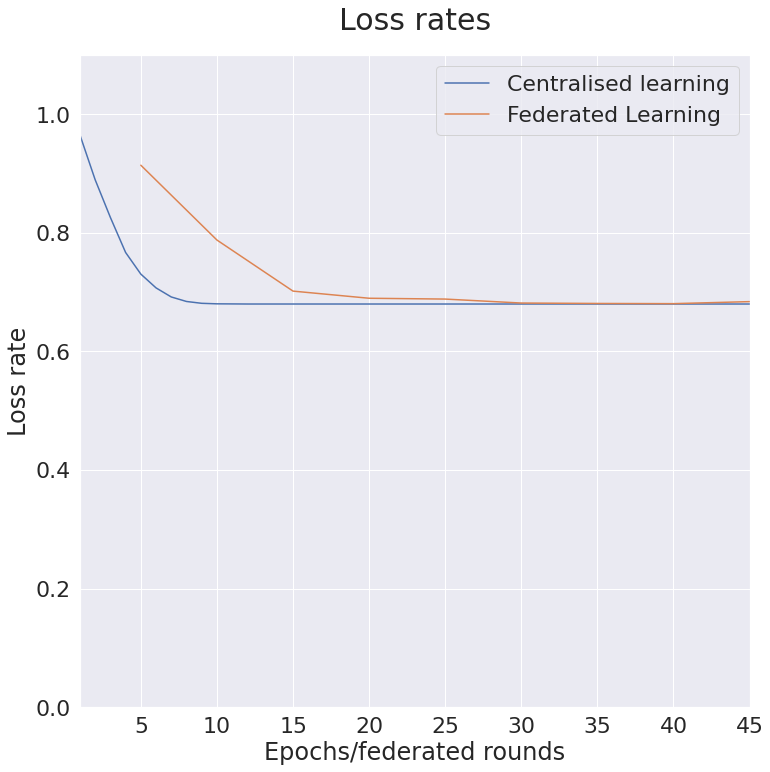

In [98]:
plot_accuracy()
plot_precision()
plot_recall()
plot_f1()
plot_loss()


In [99]:
y_pred_centralized = evaluate_model(X_test, y_test,  model, 1, accuracy_list_centralized, 
                      recall_list_centralized, precision_list_centralized, 
                      f1_list_centralized, loss_list_centralized)



 1 | accuracy: 98.528% | recall: 0.7647058823529411| precision: 93.413% | f1: 0.8409703504043126
  | loss: 68.006%


In [100]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
'Function to plot ROC and AUC of both models'
def roc_auc_plot(y_test, y_pred_federated, y_pred_centralized):
  
  plt.figure(1)
  plt.figure(figsize = (12, 12))
  y_test = y_test.ravel()
  y_pred_federated = y_pred_federated.ravel()
  y_pred_centralized = y_pred_centralized.ravel()

  #Federated learning ROC and AUC
  
  fpr_federated, tpr_federated, thresholds_federated = roc_curve(y_test, y_pred_federated)
  auc_federated = auc(fpr_federated, tpr_federated)
  #Centralized learning ROC and AUC
  
  fpr_centralized, tpr_centralized, thresholds_centralized = roc_curve(y_test, y_pred_centralized)
  auc_centralized = auc(fpr_centralized, tpr_centralized)
  #Plot
  plt.figure(figsize = (12, 12))
  plt.plot([0, 1], [0, 1], 'k--')
  plt.plot(fpr_federated, tpr_federated, label='Federated Learning (area = {:.3f})'.format(auc_federated))
  plt.plot(fpr_centralized, tpr_centralized, label='Centralised learning (area = {:.3f})'.format(auc_centralized))
  plt.xlabel('False positive rate')
  plt.ylabel('True positive rate')
  plt.title('ROC curves')
  plt.legend(loc='best')
  plt.show()

<Figure size 432x288 with 0 Axes>

<Figure size 864x864 with 0 Axes>

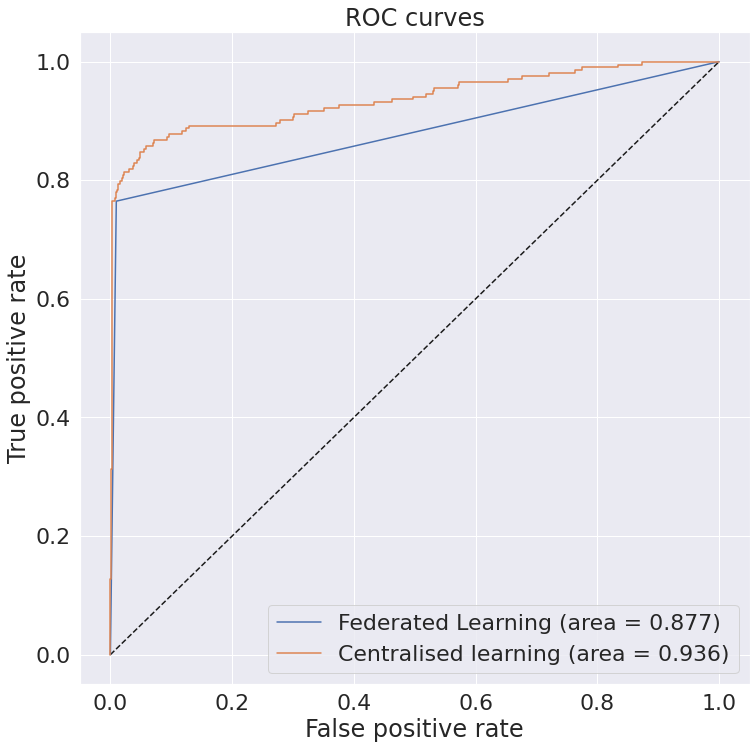

In [101]:
roc_auc_plot(y_test, y_pred_federated, y_pred_centralized)

In [102]:
'Function to plot confusion matrix of aggregated truths and predictions'
def plot_aggregate_cm(y_test, y_pred):
  #Calculate aggregate confusion matrix
  y_pred = np.around(y_pred)
  y_test = np.asarray(y_test).astype(int)
  y_pred = np.asarray(y_pred).astype(int)
  confusion_matrices = multilabel_confusion_matrix(y_test, y_pred)
  sum_matrix = np.array(([0,0],[0,0]))
  for matrix in confusion_matrices:
    sum_matrix += matrix
  sum_matrix

  #Plot matrix
  plt.figure(figsize = (10, 10))
  sns.set(font_scale=2)
  group_names = ['True Neg','False Pos','False Neg','True Pos']
  group_counts = ['{0:0.0f}'.format(value) for value in
                  sum_matrix.flatten()]
  group_percentages = ['{0:.2%}'.format(value) for value in
                      sum_matrix.flatten()/np.sum(sum_matrix)]
  plot_labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
            zip(group_names,group_counts,group_percentages)]        
  plot_labels = np.asarray(plot_labels).reshape(2,2)
  plt.title('Aggregated Predictions Confusion Matrix', fontsize=30, pad=30)
  sns.heatmap(sum_matrix,annot=plot_labels, fmt='')

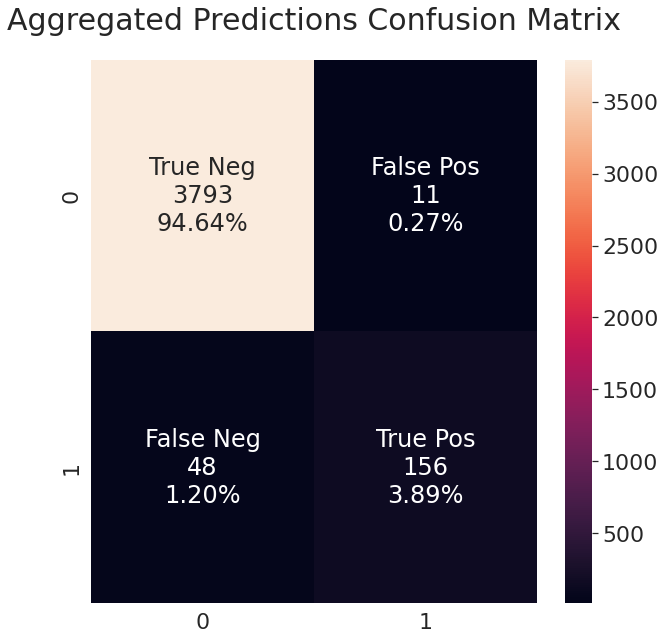

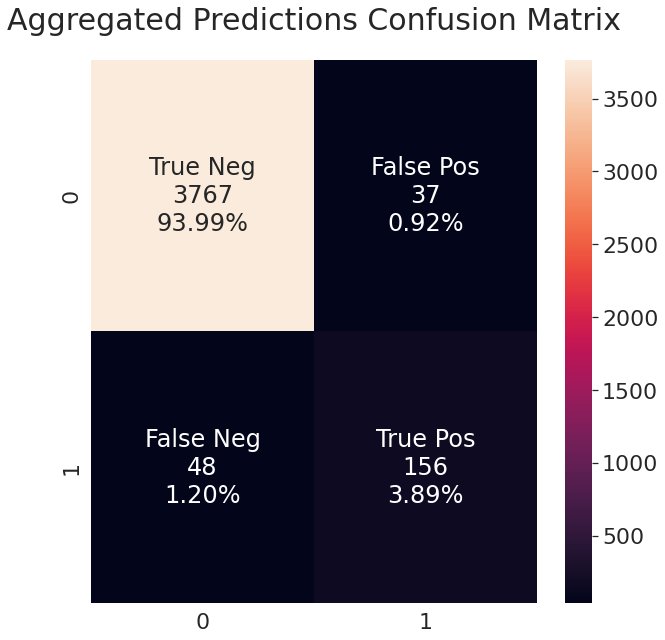

In [103]:
plot_aggregate_cm(y_test, y_pred_centralized)
plot_aggregate_cm(y_test, y_pred_federated)

In [104]:
def plot_cms(y_test, y_pred):
  y_test = np.asarray(y_test).astype(int)
  y_pred = np.around(y_pred_centralized)
  y_pred = np.asarray(y_pred).astype(int)
  confusion_matrices = multilabel_confusion_matrix(y_test, y_pred)
  fig, axs = plt.subplots(5,5, figsize=(50, 50))
  fig.subplots_adjust(hspace = .3, wspace=0.1)
  axs = axs.ravel()
  for i in range(24):
    cm = confusion_matrices[i]
    #Plot matrix
    sns.set(font_scale=2)
    group_names = ['True Neg','False Pos','False Neg','True Pos']
    group_counts = ['{0:0.0f}'.format(value) for value in
                    cm.flatten()]
    group_percentages = ['{0:.2%}'.format(value) for value in
                        cm.flatten()/np.sum(cm)]
    plot_labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
              zip(group_names,group_counts,group_percentages)]        
    plot_labels = np.asarray(plot_labels).reshape(2,2)
    axs[i].set_title(target_labels[i], pad = 25)
    sns.heatmap(cm, ax=axs[i],annot=plot_labels, fmt='')

    

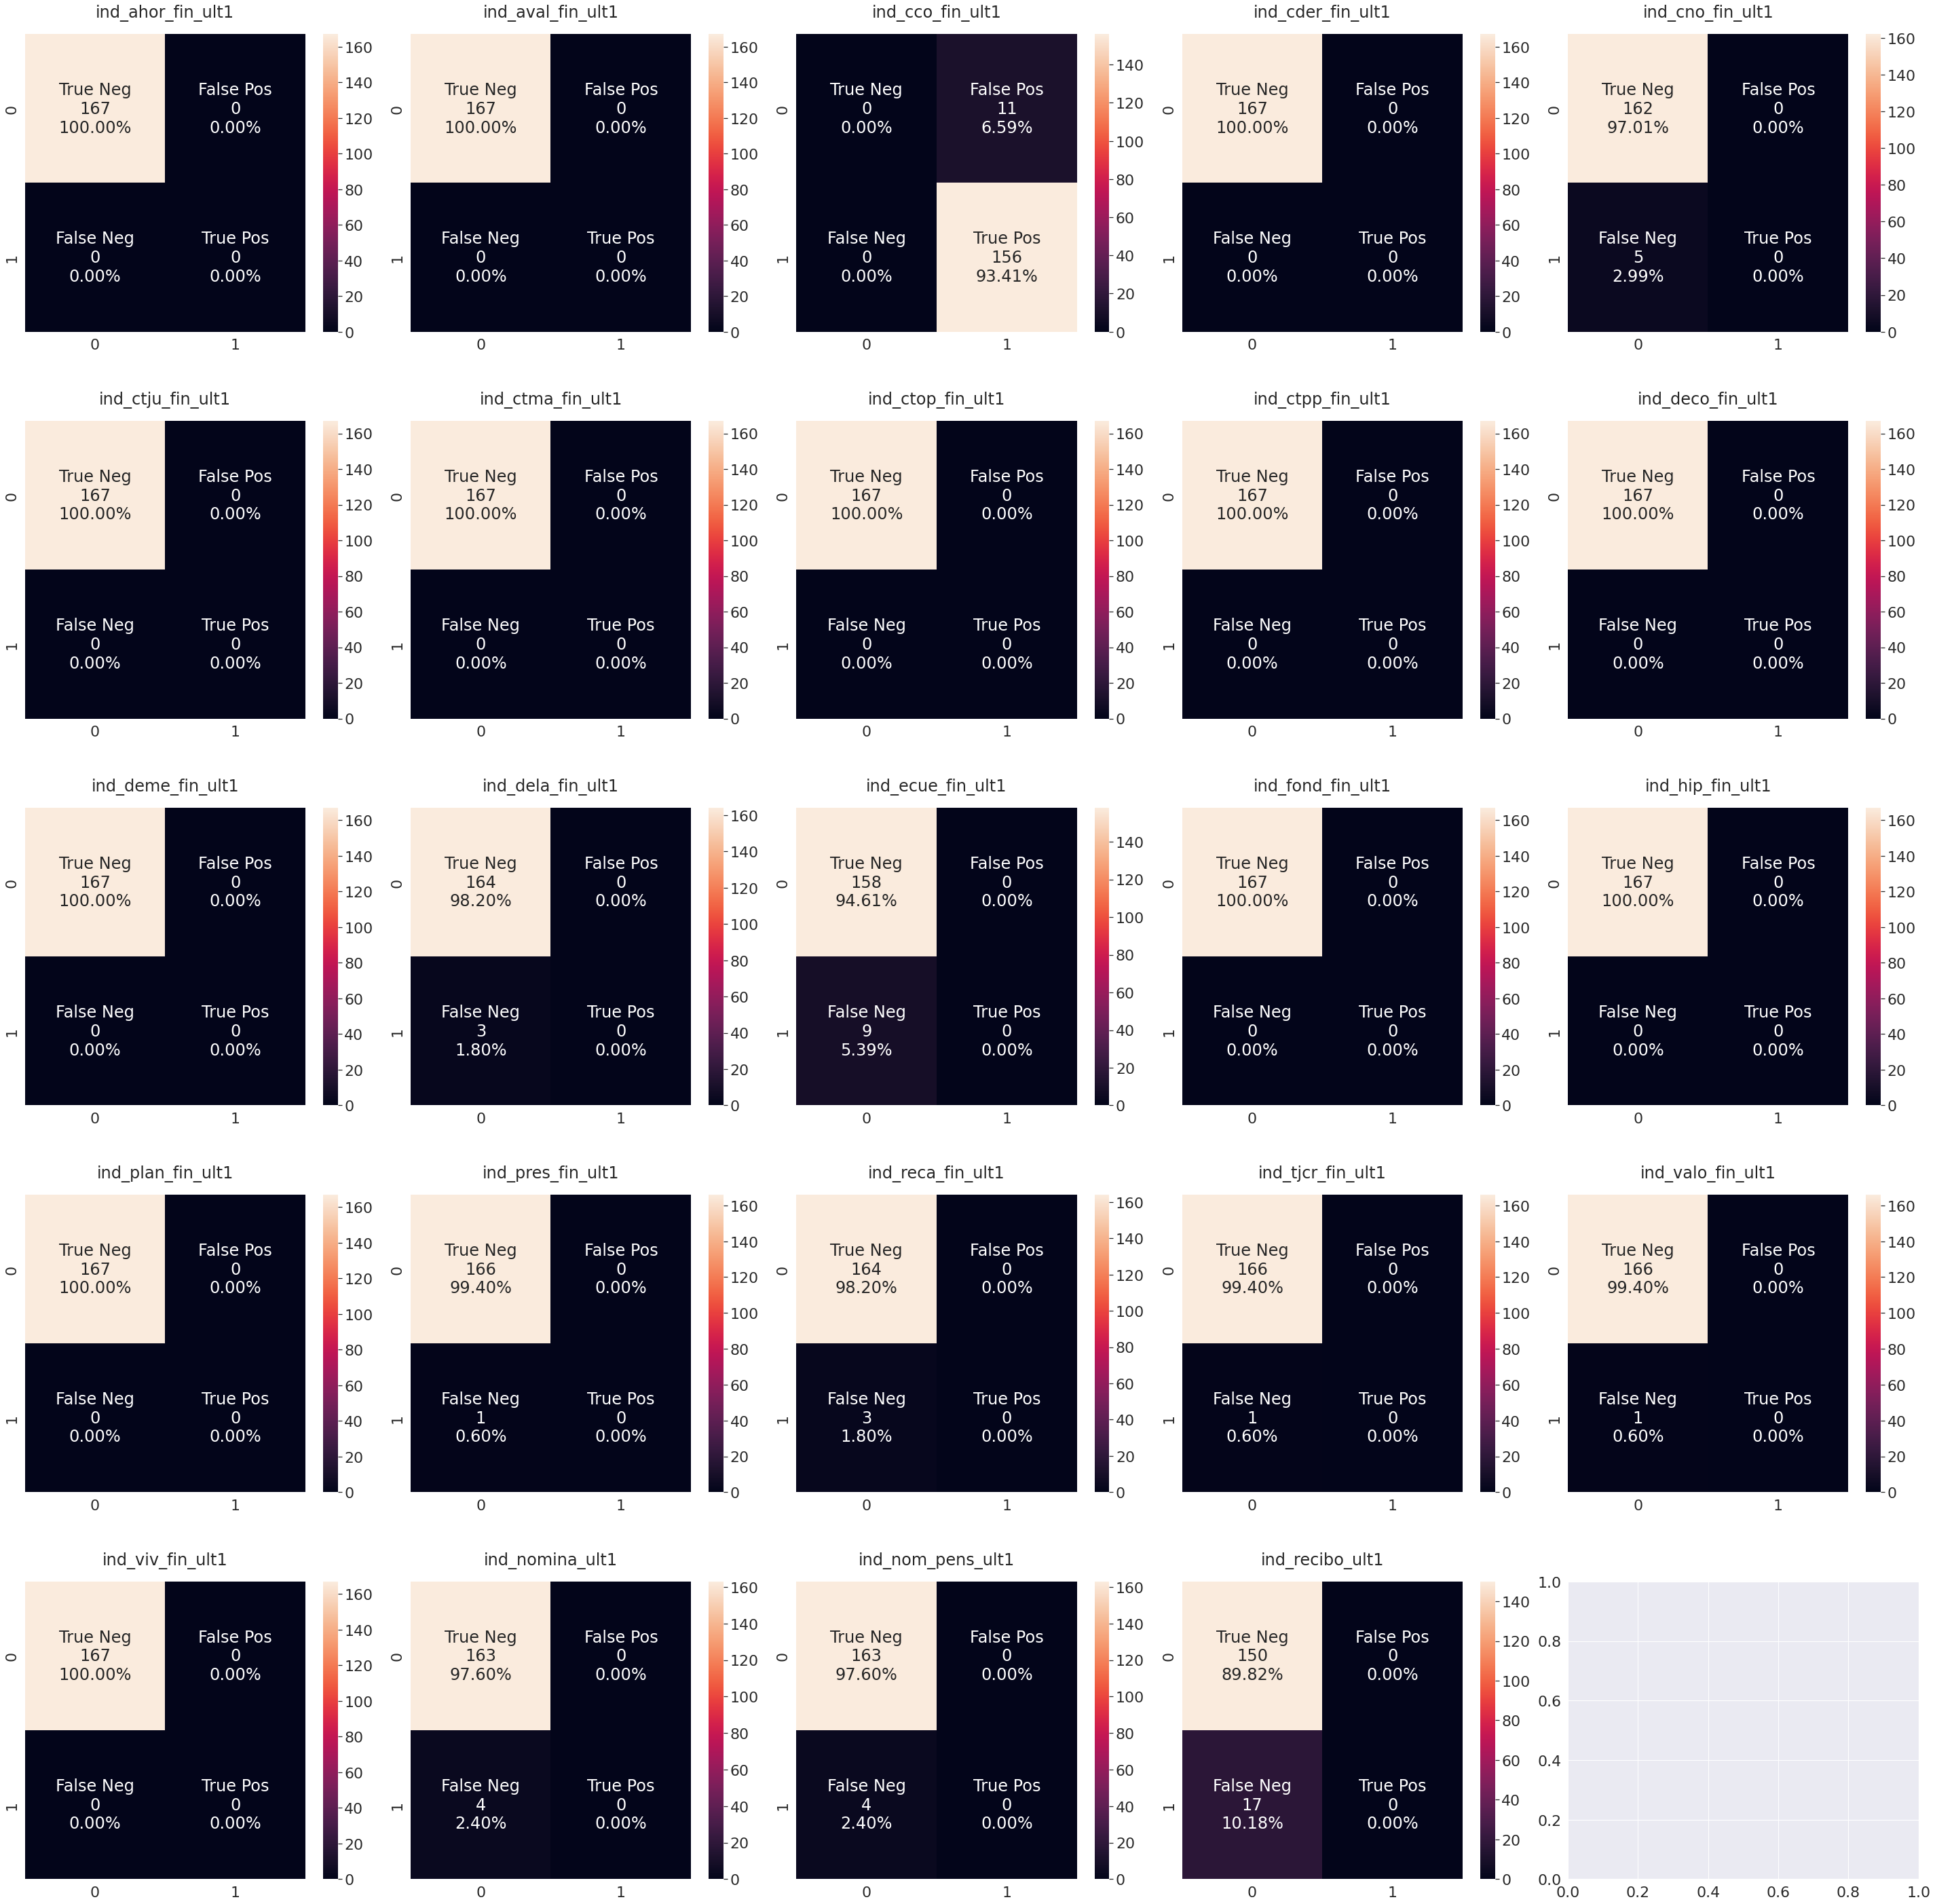

In [105]:
plot_cms(y_test, y_pred_centralized)

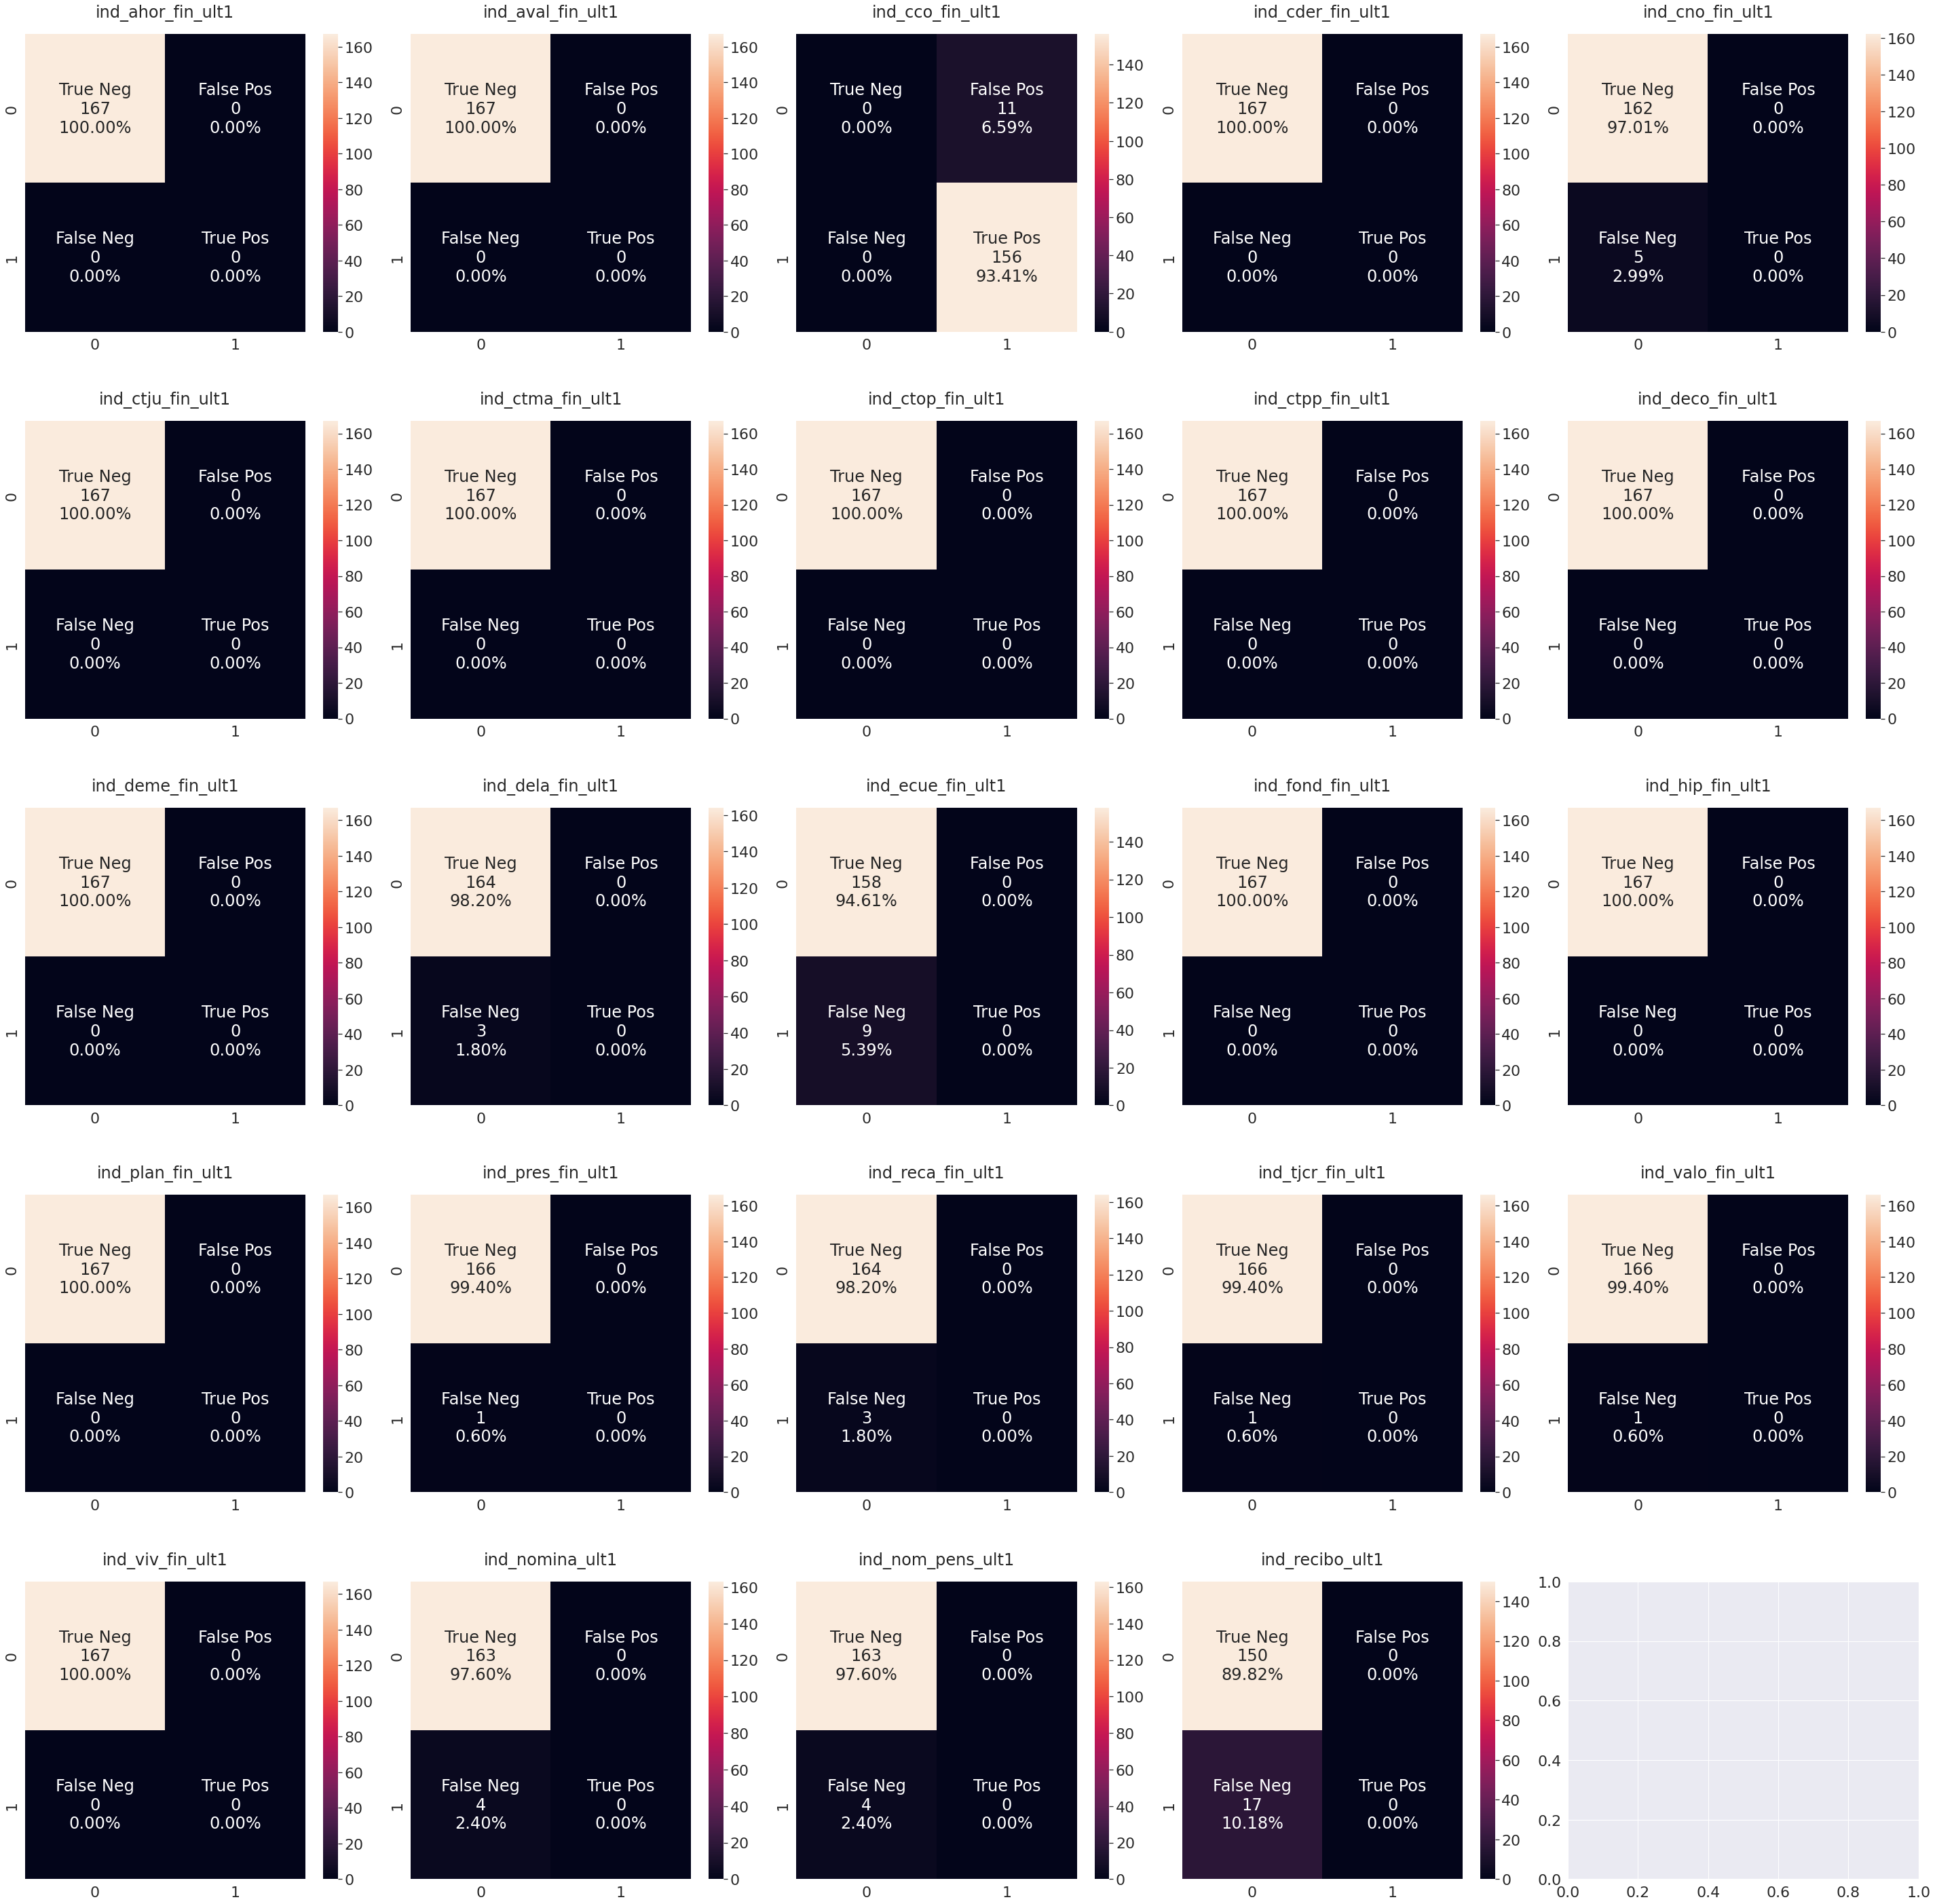

In [106]:
plot_cms(y_test, y_pred_federated)